In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# khi su dung countplot thi se thuong co RuntimeWarning , FuturetimeWarning
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="Pass the following variable as a keyword arg: x")
warnings.filterwarnings("ignore", message="X does not have valid feature names, but KNeighborsClassifier was fitted with feature names")

df = pd.read_csv('diabetes.csv')
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("dimension of the data : {}" .format(df.shape))

dimension of the data : (768, 9)


In [4]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

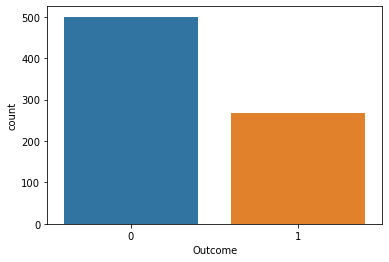

In [5]:
import seaborn as sns
sns.countplot(df['Outcome'] , label = "Count")

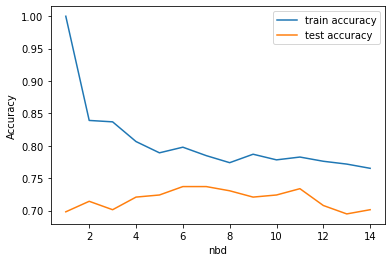

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df.loc[:,df.columns!='Outcome'] , df['Outcome'] ,random_state= 80 , train_size=.6)


from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
test_accuracy = []


nbd=range(1,15)


for n_nbd in nbd:
    knn = KNeighborsClassifier(n_neighbors=n_nbd)
    knn.fit(x_train,y_train)
    
    
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))



    
plt.plot(nbd, train_accuracy, label="train accuracy")
plt.plot(nbd, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("nbd")

plt.legend()





In [7]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.782608695652174
0.7337662337662337


In [8]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

1.0
0.6883116883116883


In [9]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)

print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))
print(tree.feature_importances_)

0.7913043478260869
0.7532467532467533
[0.04598683 0.64752304 0.         0.         0.         0.24454402
 0.06194612 0.        ]


In [10]:
x= df.loc[:,df.columns!='Outcome']
y=df['Outcome'] 

In [11]:
from sklearn.tree import DecisionTreeRegressor
mytree =DecisionTreeRegressor()
mytree.fit(x,y)

DecisionTreeRegressor()

In [12]:
y_pred = mytree.predict(x)
mytree.score(x,y)

1.0